# Frequency domain solution for HW5, Q6 - Spring 2022
This notebook creates a Bode plot for the magnitude of the transfer function for the RLC series circuit.
It also plots the eigenvalues and allows the user to change values of R, L, and C interactively.

Figure 1: Log-log plot of $|H(jw)|$

Figure 2: Eigenvalues the circuit

<IPython.core.display.Javascript object>


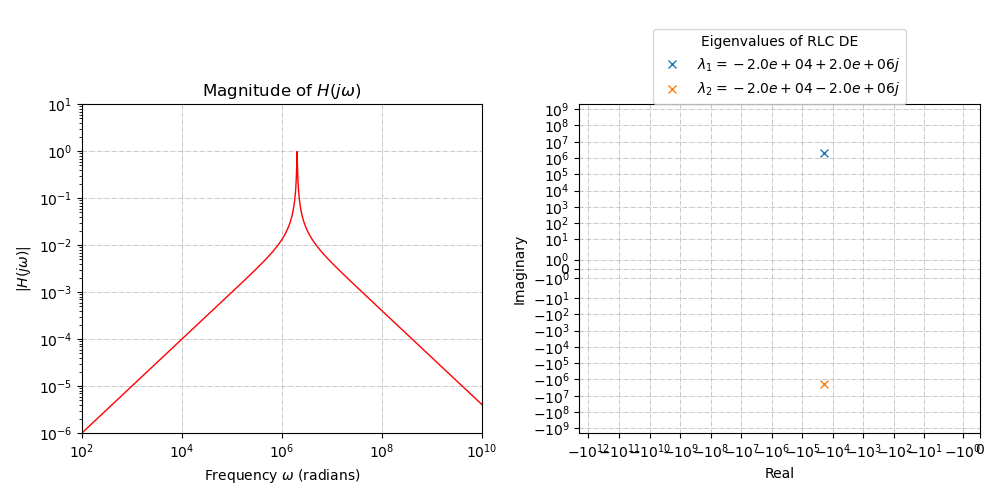

interactive(children=(FloatLogSlider(value=1.0, description='R (Ω)', min=-1.0, step=0.05), FloatLogSlider(valu…

In [3]:
%matplotlib notebook
from ipywidgets import interactive, widgets
import math
import matplotlib.pyplot as plt
import numpy as np

def eigval(R, L, C):
    if R > 2 * math.sqrt(L / C):
        l1 = (-R / (2 * L)) + math.sqrt((R / (2 * L)) ** 2 - 1 / (L * C))
        l2 = (-R / (2 * L)) - math.sqrt((R / (2 * L)) ** 2 - 1 / (L * C))
    else:
        l1 = (-R / (2 * L)) + 1j * math.sqrt(1 / (L * C) - (R / (2 * L)) ** 2)
        l2 = (-R / (2 * L)) - 1j * math.sqrt(1 / (L * C) - (R / (2 * L)) ** 2)
    return l1, l2

def H_omega_mag(w, R, L, C): # magnitude of the transfer function H(w)
    """
        |H(w)| = 1/sqrt(1 + (w * L/R - 1 / (w*R*C)) ** 2)
    """
    # Transfer function magnitude
    return 1 / np.sqrt(1 + (1 / R ** 2) * (w * L - (1 / (w * C))) ** 2)

w = np.logspace(2, 10, 1000)
R = 1
C = 10e-9 # 10nF
L = 25e-6 # 25uH
f0 = 1 / np.sqrt(L * C) / (2 * np.pi)
alpha = R / (2 * L)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)

# Plot |H(w)|
l, = ax1.loglog(w, H_omega_mag(w, R, L, C), linewidth=1, color='red', linestyle='-')
ax1.grid(linestyle='-.', linewidth=0.5)
ax1.set_xlim([1e2, 1e10])
ax1.set_ylim([1e-6, 1e1])
ax1.set_xlabel('Frequency $\omega$ (radians)')
ax1.set_ylabel('$|H(j\omega)|$')
ax1.set_title('Magnitude of $H(j\omega)$')

# Plot eigenvalues and unit circle
eigenvalues = eigval(R, L, C)
eig1, = ax2.plot(np.real(eigenvalues[0]), np.imag(eigenvalues[0]), linestyle='None', marker='x', label="Eigenvalues")
eig2, = ax2.plot(np.real(eigenvalues[1]), np.imag(eigenvalues[1]), linestyle='None', marker='x', label="Eigenvalues")

# Add grid, labels, legend
ax2.grid(linestyle='-.', linewidth=0.5)
ax2.ticklabel_format(style='sci', scilimits=(-2, 2))
ax2.set_yscale("symlog")
ax2.set_xscale("symlog")
ax2.set_xlim([-2e12, 0])
ax2.set_ylim([-2e9, 2e9])
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginary')
ax2.legend([f"$\lambda_1 = {eigenvalues[0]:.1e}$", f"$\lambda_2 = {eigenvalues[1]:.1e}$"], title="Eigenvalues of RLC DE", loc="upper center", bbox_to_anchor=(0.5, 1.25))
plt.tight_layout()


# Main update function for plot
def update(R=1, L=25e-6, C=10e-9):
    eigenvalues = eigval(R, L, C)
    l.set_ydata(H_omega_mag(w, R, L, C))
    eig1.set_xdata(np.real(eigenvalues[0]))
    eig2.set_xdata(np.real(eigenvalues[1]))
    eig1.set_ydata(np.imag(eigenvalues[0]))
    eig2.set_ydata(np.imag(eigenvalues[1]))
    ax2.legend([f"$\lambda_1 = {eigenvalues[0]:.1e}$", f"$\lambda_2 = {eigenvalues[1]:.1e}$"], title="Eigenvalues of RLC DE", loc="upper center", bbox_to_anchor=(0.5, 1.25))
    fig.canvas.draw_idle()


# Include sliders for relevant quantities
R_slider = widgets.FloatLogSlider(value=1.0, base=10, min=-1, max=4, step=.05, description="R (Ω)")
L_slider = widgets.FloatLogSlider(value=25e-6, min=-8, max=-4, step=.05, description="L (H)", readout_format=".1e")
C_slider = widgets.FloatLogSlider(value=10e-9, min=-10, max=-4, step=.05, description="C (F)", readout_format=".1e")
interactive(update, 
            R=R_slider,
            L=L_slider,
            C=C_slider)

## CHANGELOG
- 2019/09/22: initial version (code based on fa19hw3)
- 2021/02/25: fixed eigen values
- 2021/09/21: changed to use ipywidgets
- 2022/02/14: updated for sp22hw05